In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics

# Question 1

# 1

In [27]:
data=pd.read_csv('/kaggle/input/fifa-22-complete-player-dataset/players_22.csv')
data

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


# 2

In [28]:
df= data.iloc[:, 5:10]
df

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


# 3

In [29]:
df.isnull().sum()

overall       0
potential     0
value_eur    74
wage_eur     61
age           0
dtype: int64

In [30]:
df.dropna(inplace=True)
df.isnull().sum()

overall      0
potential    0
value_eur    0
wage_eur     0
age          0
dtype: int64

# 4

In [31]:
df = ((df - df.min()) / (df.max() - df.min())) * 10 + 1
df

,overall,potential,value_eur,wage_eur,age
0,11.000000,10.565217,5.020341,10.141631,7.666667
1,10.782609,10.347826,7.159616,8.711016,6.925926
2,10.565217,10.130435,3.319231,8.711016,8.407407
3,10.565217,10.130435,7.649329,8.711016,5.814815
4,10.565217,10.130435,7.468908,11.000000,6.185185
...,...,...,...,...,...
19234,1.000000,1.652174,1.003144,1.014306,3.222222
19235,1.000000,3.173913,1.005206,1.000000,2.111111
19236,1.000000,2.304348,1.004691,1.000000,2.851852
19237,1.000000,3.391304,1.005206,1.000000,2.111111


In [32]:
#to make sure it is Standarized
df.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.146473,1.243826,4.403716
std,1.496262,1.323418,0.392477,0.557253,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.024022,1.014306,2.851852
50%,5.130435,5.782609,1.049796,1.071531,4.333333
75%,6.000000,6.652174,1.102634,1.214592,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


# 5

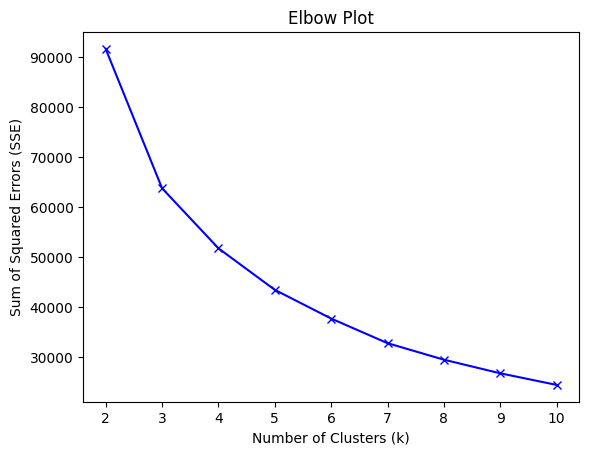

In [39]:
sse = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot')
plt.show()

# Step 6: Choose the best value for k and plot the results
best_k = 4  # Choose the value of k based on the elbow plot

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_


# visualizeing the number of clusters and their distribution

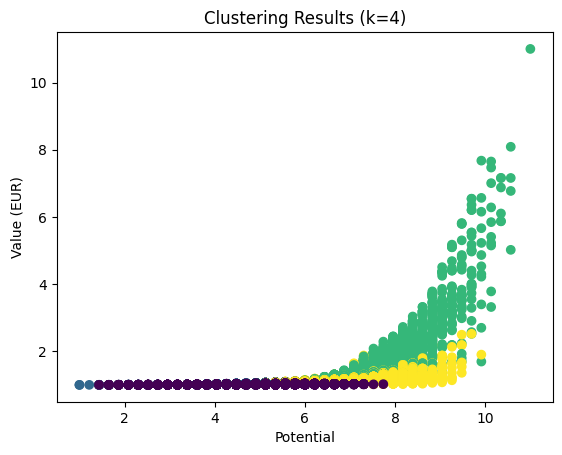

In [41]:
# Plot the results
plt.scatter(data['potential'], data['value_eur'], c=labels)
plt.xlabel('Potential')
plt.ylabel('Value (EUR)')
plt.title(f'Clustering Results (k={best_k})')
plt.show()

# Question 2

# 1

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [52]:
# Step 1: Download the dataset "countries_continents.csv"
data = pd.read_csv('/kaggle/input/countries/countries_continents.csv')
data

,Country,Longitude,Latitude,Continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


# 2

In [50]:
# Step 2: Perform K-Means clustering
k = len(data['Continent'].unique())  # Number of clusters = number of unique continents

# 3

In [53]:
# Step 3: Convert country names and continents to numerical values
label_encoder = LabelEncoder()
data['continent_code'] = label_encoder.fit_transform(data['Continent'])

# 4

In [54]:
# Step 4: Run the clustering algorithm
X = data[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
predicted_labels = kmeans.labels_

# 5

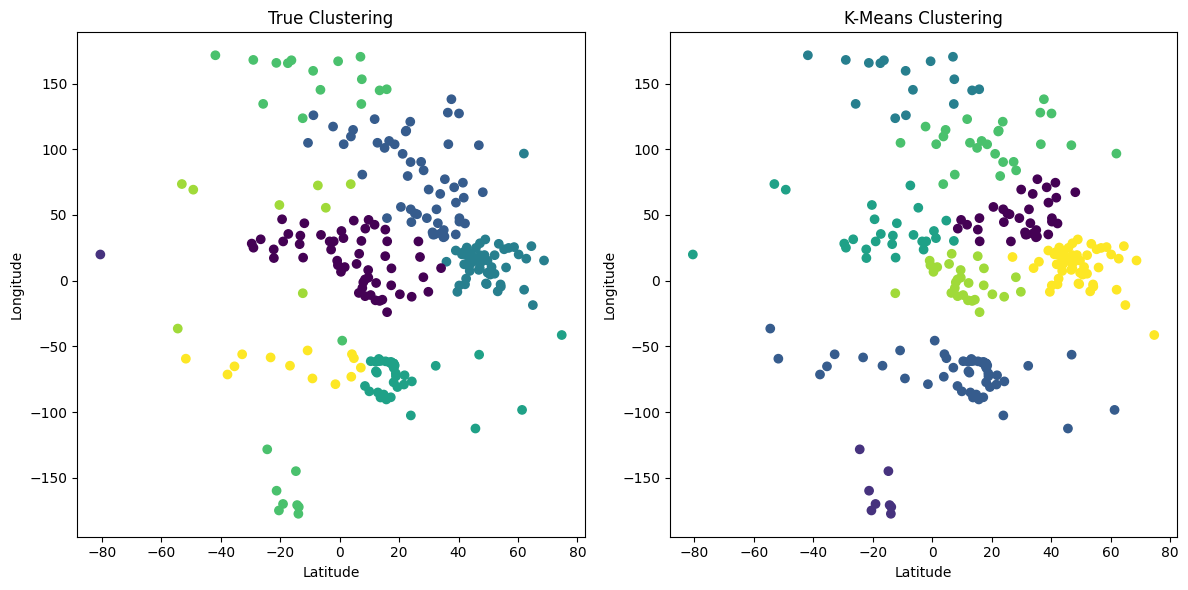

In [55]:
# Step 5: Plot and compare the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# True clustering
ax1.scatter(data['Latitude'], data['Longitude'], c=data['continent_code'])
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
ax1.set_title('True Clustering')

# K-Means clustering
ax2.scatter(data['Latitude'], data['Longitude'], c=predicted_labels)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Longitude')
ax2.set_title('K-Means Clustering')

plt.tight_layout()
plt.show()